In [2]:
source(file.path("../../src/00.0_init.R"))

Joining, by = "species"



In [3]:
library(kebabs)
library(caret)
library(ROCR)

Loading required package: kernlab


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:Biostrings’:

    type


The following object is masked from ‘package:BiocGenerics’:

    type


Loading required package: lattice


Attaching package: ‘ROCR’


The following object is masked from ‘package:kebabs’:

    performance




In [4]:
annot_full <- fread(file.path(analysis_dir, "validation", "03_WGBS", "WGBS_prediction_selection.tsv"))

In [5]:
head(annot_full)

Species,genomeId,Species_match,data_type,thr
<chr>,<chr>,<chr>,<chr>,<int>
Mus_musculus,mm9,MOU,CpG.calls.txt,10
Gallus_gallus,galGal5,CHK,cov_and_ratio,10
Phascolarctos_cinereus,phaCin_unsw_v4.1,KOA,CpGreport,10
Bos_taurus,bosTau9,ANW,CpGreport,10
Danio_rerio_GSE134055,danRer11,ZF,gemBS,10
Branchiostoma_lanceolatum,Bl71nemr,FLA,Misc,5


In [6]:
path_to_results <- file.path(analysis_dir, "validation", "03_WGBS", "03.4_prediction")

In [7]:
setwd(path_to_results)

In [8]:
dir.create("summary")

Warning message in dir.create("summary"):
“'summary' already exists”


In [34]:
models

[1] "Bos_taurus/kebabs_model/RCache/methPred_noRand_uc_1234.RData"               
 [2] "Bos_taurus/kebabs_model/RCache/methPred_Rand_uc_1_1234.RData"               
 [3] "Bos_taurus/kebabs_model/RCache/methPred_Rand_uc_2_1234.RData"               
 [4] "Bos_taurus/kebabs_model/RCache/methPred_Rand_uc_3_1234.RData"               
 [5] "Bos_taurus/kebabs_model/RCache/methPred_Rand_uc_4_1234.RData"               
 [6] "Bos_taurus/kebabs_model/RCache/methPred_Rand_uc_5_1234.RData"               
 [7] "Branchiostoma_lanceolatum/kebabs_model/RCache/methPred_noRand_uc_1234.RData"
 [8] "Branchiostoma_lanceolatum/kebabs_model/RCache/methPred_Rand_uc_1_1234.RData"
 [9] "Branchiostoma_lanceolatum/kebabs_model/RCache/methPred_Rand_uc_2_1234.RData"
[10] "Branchiostoma_lanceolatum/kebabs_model/RCache/methPred_Rand_uc_3_1234.RData"
[11] "Branchiostoma_lanceolatum/kebabs_model/RCache/methPred_Rand_uc_4_1234.RData"
[12] "Branchiostoma_lanceolatum/kebabs_model/RCache/methPred_Rand_uc_5_1234.RData"
[13] "Danio_rerio_GSE134055/kebabs_model/RCache/methPred_noRand_uc_1234.RData"    
[14] "Danio_rerio_GSE134055/kebabs_model/RCache/methPred_Rand_uc_1_1234.RData"    
[15] "Danio_rerio_GSE134055/kebabs_model/RCache/methPred_Rand_uc_2_1234.RData"    
[16] "Danio_rerio_GSE134055/kebabs_model/RCache/methPred_Rand_uc_3_1234.RData"    
[17] "Danio_rerio_GSE134055/kebabs_model/RCache/methPred_Rand_uc_4_1234.RData"    
[18] "Danio_rerio_GSE134055/kebabs_model/RCache/methPred_Rand_uc_5_1234.RData"    
[19] "Gallus_gallus/kebabs_model/RCache/methPred_noRand_uc_1234.RData"            
[20] "Gallus_gallus/kebabs_model/RCache/methPred_noRand_uc_41.RData"              
[21] "Gallus_gallus/kebabs_model/RCache/methPred_Rand_uc_1_1234.RData"            
[22] "Gallus_gallus/kebabs_model/RCache/methPred_Rand_uc_2_1234.RData"            
[23] "Gallus_gallus/kebabs_model/RCache/methPred_Rand_uc_3_1234.RData"            
[24] "Gallus_gallus/kebabs_model/RCache/methPred_Rand_uc_4_1234.RData"            
[25] "Gallus_gallus/kebabs_model/RCache/methPred_Rand_uc_5_1234.RData"            
[26] "Mus_musculus/kebabs_model/RCache/methPred_noRand_uc_1234.RData"             
[27] "Mus_musculus/kebabs_model/RCache/methPred_noRand_uc_539.RData"              
[28] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_1_1234.RData"             
[29] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_1_539.RData"              
[30] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_2_1234.RData"             
[31] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_2_539.RData"              
[32] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_3_1234.RData"             
[33] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_3_539.RData"              
[34] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_4_1234.RData"             
[35] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_4_539.RData"              
[36] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_5_1234.RData"             
[37] "Mus_musculus/kebabs_model/RCache/methPred_Rand_uc_5_539.RData"              
[38] "Xenopus_laevis/kebabs_model/RCache/methPred_noRand_uc_1234.RData"           
[39] "Xenopus_laevis/kebabs_model/RCache/methPred_noRand_uc_932.RData"            
[40] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_1_1234.RData"           
[41] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_1_932.RData"            
[42] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_2_1234.RData"           
[43] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_2_932.RData"            
[44] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_3_1234.RData"           
[45] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_3_932.RData"            
[46] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_4_1234.RData"           
[47] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_4_932.RData"            
[48] "Xenopus_laevis/kebabs_model/RCache/methPred_Rand_uc_5_1234.RData"           
[49] "Xenopus_lae

In [11]:
if(!file.exists(file.path("summary", "model_results_combined.tsv"))){
   models = list.files(pattern = "methPred", recursive = T) 
roc_res_full = data.table()
for(model_path in models){
    
model_name <- strsplit(model_path, "/")[[1]][4]
simpleCache(cacheName=gsub(".RData", "", model_name), instruction={ train_test(x_train=split_ds$x_train,
            x_test = split_ds$x_test, y_train = split_ds$y_train, y_test = split_ds$y_test,
                                                        ifRand='noRand', k=kmer, runid = 0)},
            cacheDir=gsub(model_name, "", model_path ), assignToVariable="res", recreate=FALSE)
roc_res=res$roc_dt   
roc_res$species <- strsplit(model_path, "/")[[1]][1]
roc_res$model <-model_name
roc_res_full <- rbind(roc_res_full, roc_res)

roc_res_full[, seedid:=gsub(".RData", "",
                            strsplit(model, "_")[[1]][length(strsplit(model, "_")[[1]])]),
                            by = row.names(roc_res_full)]
    
roc_res_full[, unique_run := paste0(run, "_", seedid), row.names(roc_res_full)]

setDT(roc_res_full)
my_wt(roc_res_full, file.path("summary", "model_results_combined.tsv"))
}
}else{
    roc_res_full <- fread(file.path("summary", "model_results_combined.tsv"))
}

In [12]:
head(roc_res_full)

fdr,tpr,auc,ifRand,k,C,run,species,model,seedid,unique_run
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>
0.00000000,0.000000000,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00000000,0.001275510,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00000000,0.002551020,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00127551,0.002551020,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00127551,0.003826531,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234
0.00127551,0.005102041,0.7790846,noRand,4,10,0,Bos_taurus,methPred_noRand_uc_1234.RData,1234,0_1234


In [13]:
auc_res <- unique(roc_res_full[, c("auc", "ifRand", "run","seedid", "species")]) %>% group_by(species, ifRand) %>% summarise(auc = mean(auc), auc_sd = sd(auc))

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



In [14]:
head(annot_full)

Species,genomeId,Species_match,data_type,thr
<chr>,<chr>,<chr>,<chr>,<int>
Mus_musculus,mm9,MOU,CpG.calls.txt,10
Gallus_gallus,galGal5,CHK,cov_and_ratio,10
Phascolarctos_cinereus,phaCin_unsw_v4.1,KOA,CpGreport,10
Bos_taurus,bosTau9,ANW,CpGreport,10
Danio_rerio_GSE134055,danRer11,ZF,gemBS,10
Branchiostoma_lanceolatum,Bl71nemr,FLA,Misc,5


In [16]:
auc_res <- left_join(auc_res, annot_full, by = c("species" = "Species"))

In [81]:
setDT(auc_res)

In [38]:
auc_rrbs <- fread(file.path(analysis_dir, "05_predict_meth", "05.1_within_species", "summary", "all_aucs.csv"))

In [39]:
head(auc_rrbs)

V1,species,k,k_freq,c,numSequences,AUC,f1,color_class,scientific_name,group
<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AB,3,0.9,1,2000,0.7005090,0.6476097,Reptilia,Abronia anzuetoi,Rep.
2,ABB,3,0.5,1,1810,0.7520430,0.6972771,Mammalia,Ursus,Mam.
3,ABU,2,0.7,10,720,0.6597939,0.6312925,Amphibia,Hoplobatrachus tigerinus,Amp.
4,AC,3,0.4,1,2000,0.7644490,0.7008462,Aves,Serinus,Av.
5,ACO,3,0.5,1,2000,0.6021450,0.5619919,Actinopteri,Gadus morhua,Act.
6,ACT,4,0.6,1,486,0.7130180,0.6242300,Amphibia,Duttaphrynus melanostictus,Amp.


In [ ]:
"/nobackup/lab_bock/projects/DNAmeth500species//results_analysis/05_predict_meth/05.1_within_species/summary/"

In [31]:
frogs <- unique(stats_annot[grep("frog", stats_annot$English), c("species", "English", "ncbi_name")])

In [40]:
auc_frogs <- auc_rrbs %>% filter(species %in% frogs$species) %>% group_by(color_class) %>% 
                summarize(AUC = mean(AUC))
auc_frogs$species <- "ALL FROGS"

In [44]:
auc_rrbs <- rbind(auc_rrbs, auc_frogs, fill = TRUE)

In [33]:
tail(stats_annot_mean_meth)

color_class,species,English,m_rrbs,min_rrbs,max_rrbs
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Mammalia,WI,Wildebeest,59.85764,55.61712,70.27759
Mammalia,WM,Wood mouse,57.54294,49.94996,65.13593
Mammalia,YM,Yellow mongoose,65.36842,58.92703,71.80980
Mammalia,YNM,Yellow-necked mouse,58.14843,55.54581,60.75105
Mammalia,ZE,Zebra,53.70069,50.08679,58.52117
Amphibia,ALL FROGS,Clawed frog,83.14440,77.22157,92.21815


In [49]:
auc_res <- left_join(auc_res, auc_rrbs[, c("species", "AUC")], by = c("Species_match" ="species"))

In [52]:
setDT(auc_res)

In [54]:
auc_res[,x:=0.7,]
auc_res[,y:=ifelse(ifRand=="rand", 0.08, 0.13),]

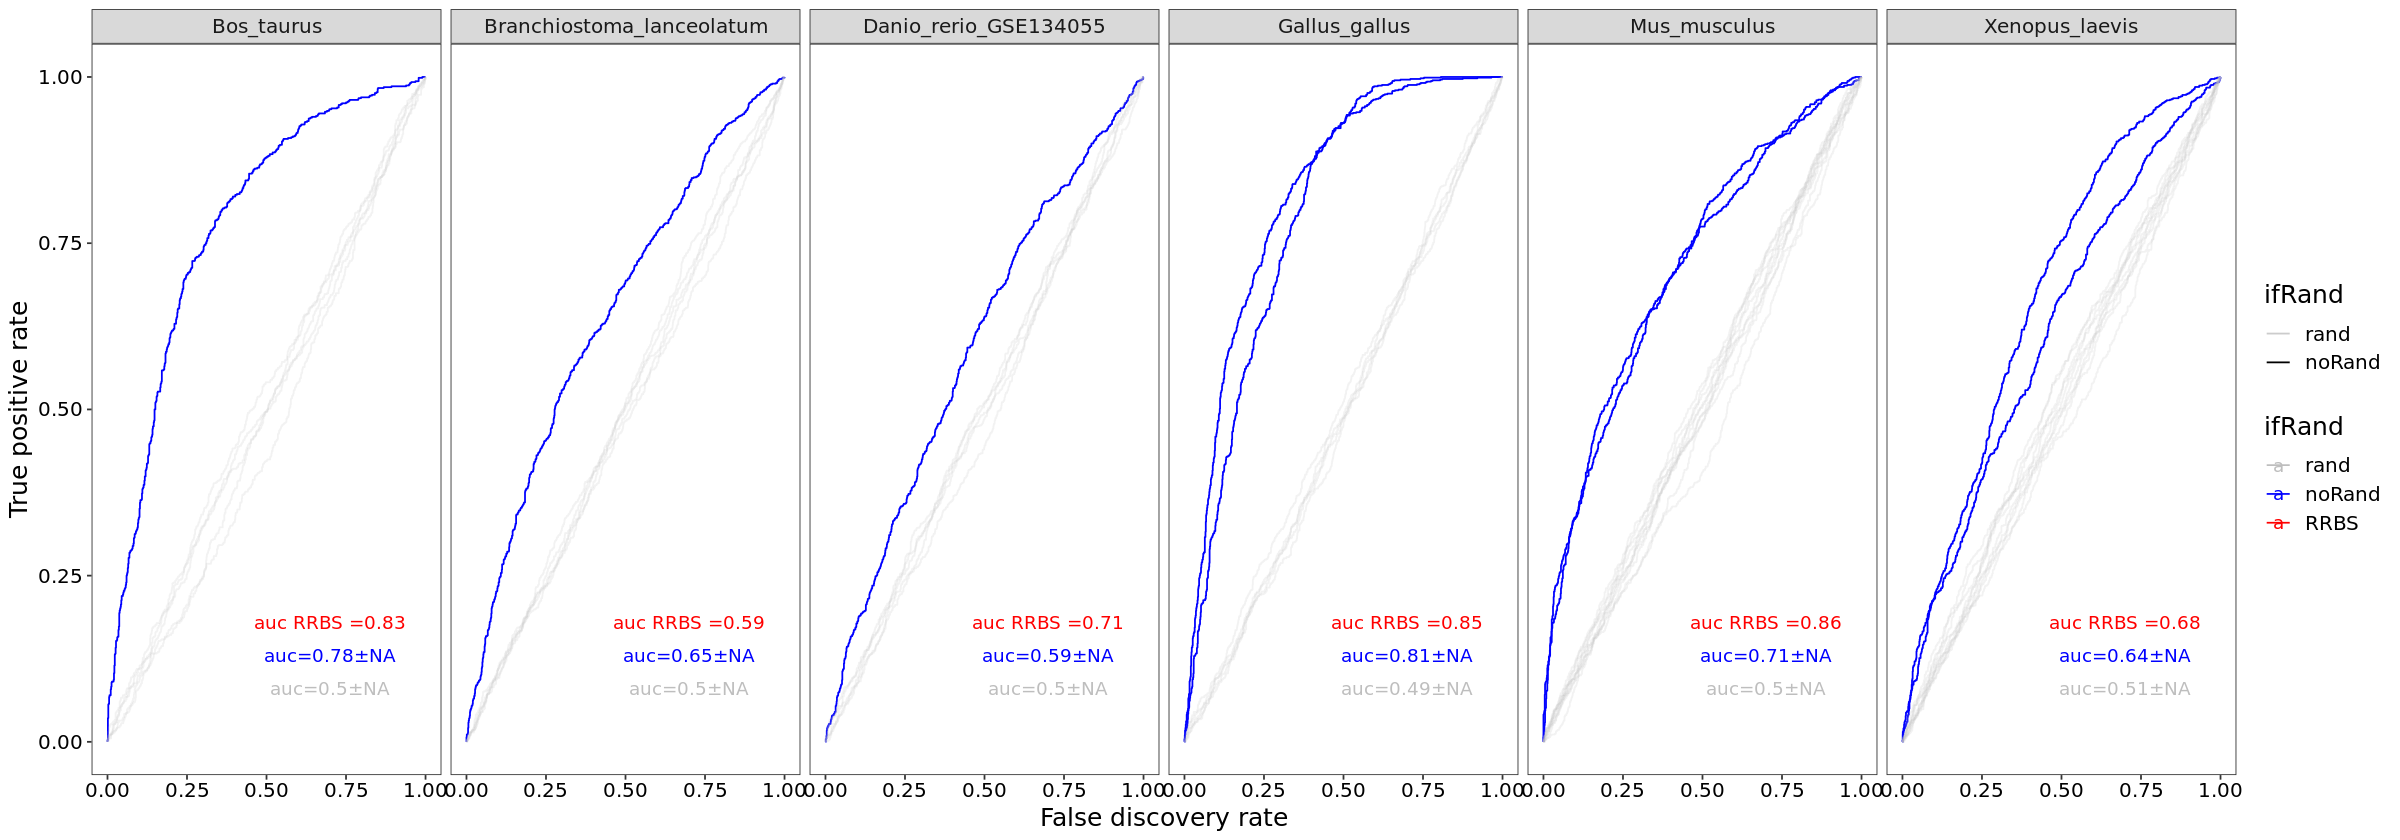

In [55]:
options(repr.plot.width = 20)
ggplot(roc_res_full, aes(x = fdr, y = tpr, color = ifRand)) + 
        geom_line(aes(group=unique_run, alpha=ifRand)) +  facet_wrap(.~species, ncol = 7) + 
    geom_text(data=auc_res,aes(x=x,y=y,label=paste0("auc=",round(auc,2), "±", round(auc_sd, 2))))+
 geom_text(data=auc_res[ifRand == "noRand"],aes(x=x,y=y+0.05,label=paste0("auc RRBS =",round(AUC,2))), color = "red") +
 scale_color_manual(values=c("rand"="grey","noRand"="blue", "RRBS" = "red"))+
    scale_alpha_manual(values=c("rand"=0.2,"noRand"=1)) + 
    labs(x = "False discovery rate", y = "True positive rate") +
    theme(text = element_text(size = 15)) + facet_wrap(.~species, ncol = 6)
ggsave("summary/WGBS_auc.pdf", width = 20, height = 4)